In [28]:
%load_ext autoreload
%autoreload 2

import torch
import pickle
import numpy as np
from tflearning.data import torchvisiondatasets
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
def compute_layer_prediction_entropies(layer_preds, num_classes):
    # compute entropy over layer predictions
    pred_counts = np.zeros((len(layer_preds), num_classes))
    # 1 count occurences of predictions accross layers 
    for i in range(layer_preds.shape[0]):
        pred_counts[i] = np.bincount(layer_preds[i, :], minlength=num_classes)
    # 2 compute entropy per sample
    entropies = torch.distributions.Categorical(probs=torch.tensor(pred_counts)).entropy().numpy()
    return entropies

In [30]:
def plot_entropy_hist(pred_results_file, num_classes, bins=50, datasetname='', save=False):
    with open(pred_results_file, 'rb') as f:
        pred_depth_results = pickle.load(f)
    layer_preds = pred_depth_results['train']['layer_preds']
    entropies = compute_layer_prediction_entropies(layer_preds, num_classes)
    plt.hist(entropies, bins=bins)
    plt.title(f'Entropy of predictions accross layers for all samples - {datasetname}')
    plt.xlabel('Entropy')
    plt.ylabel('Count')
    if save:
        plt.savefig(f'./entropy_hist_{datasetname}.png')
    plt.show()
    

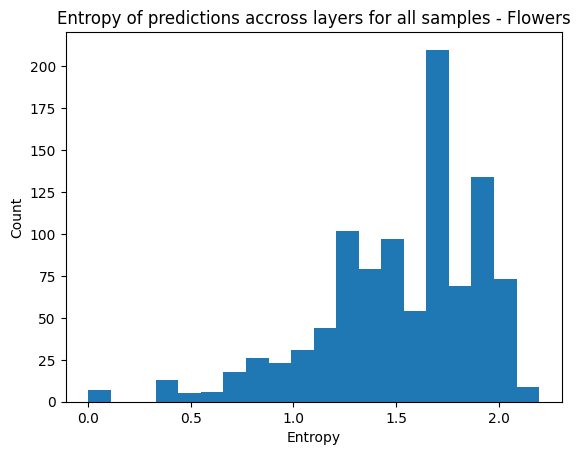

In [31]:
# Flowers
pred_depth_result_file = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/PD-Flowers102_timmresnet-imagenet--230227_105524/prediction_depth_results.p'
plot_entropy_hist(pred_depth_result_file, num_classes=102, bins=20, datasetname='Flowers')

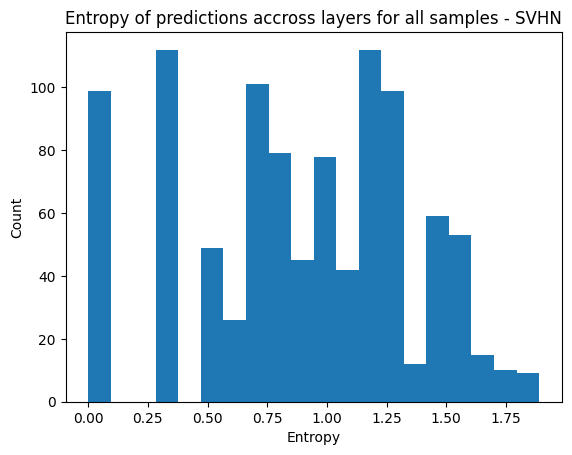

In [32]:
# SVHN
pred_depth_result_file = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/PD-SVHN_timmresnet-imagenet--230227_105736/prediction_depth_results.p'
plot_entropy_hist(pred_depth_result_file, num_classes=10, bins=20, datasetname='SVHN')

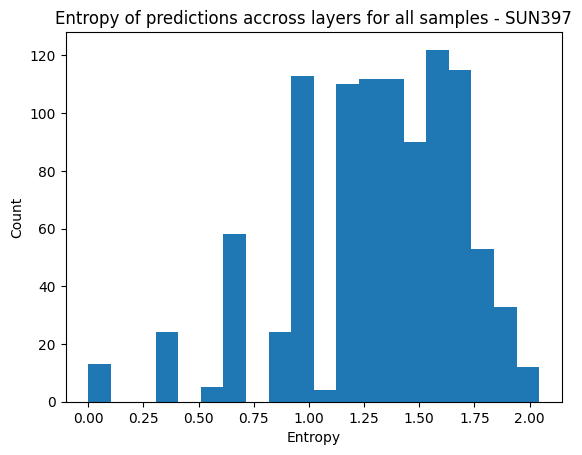

In [33]:
# SUN397
pred_depth_result_file = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/PD-SUN397_timmresnet-imagenet--230227_105623/prediction_depth_results.p'
plot_entropy_hist(pred_depth_result_file, num_classes=397, bins=20, datasetname='SUN397')

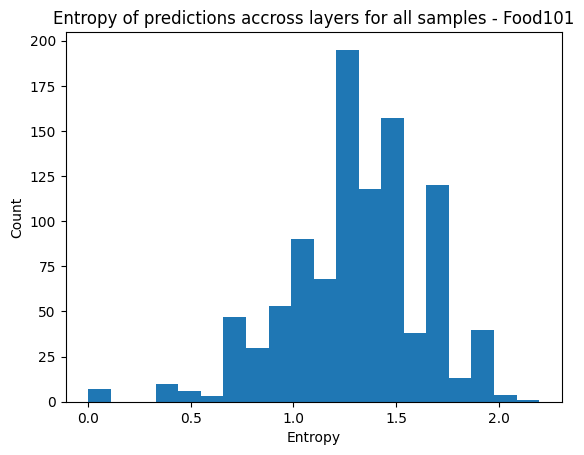

In [34]:
# Food101
pred_depth_result_file = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/PD-Food101_timmresnet-imagenet--230227_105600/prediction_depth_results.p'
plot_entropy_hist(pred_depth_result_file, num_classes=101, bins=20, datasetname='Food101')

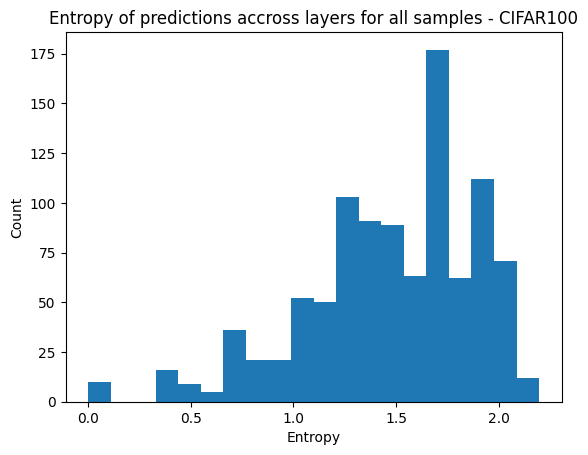

In [35]:
# CIFAR100
pred_depth_result_file = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/PD-cifar100_timmresnet-imagenet--230227_150313/prediction_depth_results.p'
plot_entropy_hist(pred_depth_result_file, num_classes=100, bins=20, datasetname='CIFAR100')

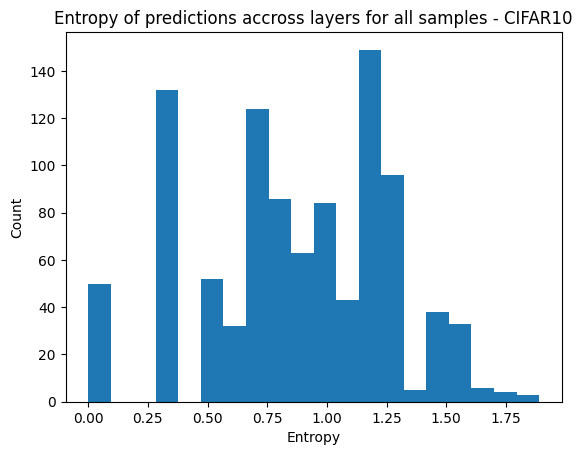

In [36]:
# CIFAR10
pred_depth_result_file = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/PD-cifar10_timmresnet-imagenet--230227_150239/prediction_depth_results.p'
plot_entropy_hist(pred_depth_result_file, num_classes=10, bins=20, datasetname='CIFAR10')